In [1]:
import numpy as np
import pandas as pd

In [2]:
df_orig = pd.read_csv('data.csv')
df_orig.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


### Features

For the rest of the homework, you'll need to use only these columns:

* `Make`,
* `Model`,
* `Year`,
* `Engine HP`,
* `Engine Cylinders`,
* `Transmission Type`,
* `Vehicle Style`,
* `highway MPG`,
* `city mpg`

In [3]:
columns = [
    'Make', 
    'Model',
    'Year',
    'Engine HP',
    'Engine Cylinders',
    'Transmission Type',
    'Vehicle Style',
    'highway MPG',
    'city mpg'
] + ['MSRP']

In [4]:
df = df_orig[columns]
df

,Make,Model,Year,Engine HP,Engine Cylinders,Transmission Type,Vehicle Style,highway MPG,city mpg,MSRP
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,Coupe,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,Convertible,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,Coupe,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,Coupe,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,Convertible,28,18,34500
...,...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012,300.0,6.0,AUTOMATIC,4dr Hatchback,23,16,46120
11910,Acura,ZDX,2012,300.0,6.0,AUTOMATIC,4dr Hatchback,23,16,56670
11911,Acura,ZDX,2012,300.0,6.0,AUTOMATIC,4dr Hatchback,23,16,50620
11912,Acura,ZDX,2013,300.0,6.0,AUTOMATIC,4dr Hatchback,23,16,50920


### Data preparation

* Select only the features from above and transform their names using next line:
  ```
  data.columns = data.columns.str.replace(' ', '_').str.lower()
  ```
* Fill in the missing values of the selected features with 0.
* Rename `MSRP` variable to `price`.

In [5]:
df.columns = df.columns.str.replace(' ', '_').str.lower()
df = df.fillna(0)
df = df.rename(columns={'msrp': 'price'})
df.head()

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg,price
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,Coupe,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,Convertible,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,Coupe,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,Coupe,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,Convertible,28,18,34500


### Question 1

What is the most frequent observation (mode) for the column `transmission_type`?

- `AUTOMATIC`
- `MANUAL`
- `AUTOMATED_MANUAL`
- `DIRECT_DRIVE`

In [6]:
df.transmission_type.value_counts()

transmission_type
AUTOMATIC           8266
MANUAL              2935
AUTOMATED_MANUAL     626
DIRECT_DRIVE          68
UNKNOWN               19
Name: count, dtype: int64

> **Answer 1**: `AUTOMATIC`

### Question 2

Create the [correlation matrix](https://www.google.com/search?q=correlation+matrix) for the numerical features of your dataset. 
In a correlation matrix, you compute the correlation coefficient between every pair of features in the dataset.

What are the two features that have the biggest correlation in this dataset?

- `engine_hp` and `year`
- `engine_hp` and `engine_cylinders`
- `highway_mpg` and `engine_cylinders`
- `highway_mpg` and `city_mpg`

In [7]:
from pandas.api.types import is_numeric_dtype

In [8]:
df.dtypes

make                  object
model                 object
year                   int64
engine_hp            float64
engine_cylinders     float64
transmission_type     object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
price                  int64
dtype: object

In [9]:
numeric = [col for col in df.columns if is_numeric_dtype(df[col])]
df[numeric].dtypes

year                  int64
engine_hp           float64
engine_cylinders    float64
highway_mpg           int64
city_mpg              int64
price                 int64
dtype: object

In [10]:
corr = df[numeric].corr()
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True
corr[mask] = np.nan
(
    corr
     .style
     .background_gradient(cmap='coolwarm', axis=None, vmin=-1, vmax=1)
     .highlight_null(color='#f1f1f1')  # Color NaNs grey
     .format(precision=2)
)

,year,engine_hp,engine_cylinders,highway_mpg,city_mpg,price
year,nan,nan,nan,nan,nan,nan
engine_hp,0.34,nan,nan,nan,nan,nan
engine_cylinders,-0.04,0.77,nan,nan,nan,nan
highway_mpg,0.26,-0.42,-0.61,nan,nan,nan
city_mpg,0.20,-0.42,-0.59,0.89,nan,nan
price,0.23,0.65,0.53,-0.16,-0.16,nan


> **Answer 2**: `highway_mpg` and `city_mpg`

### Make `price` binary

* Now we need to turn the `price` variable from numeric into a binary format.
* Let's create a variable `above_average` which is `1` if the `price` is above its mean value and `0` otherwise.

In [11]:
df['above_average'] = (df.price > df.price.mean()).astype(int) 
df.head()

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg,price,above_average
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,Coupe,26,19,46135,1
1,BMW,1 Series,2011,300.0,6.0,MANUAL,Convertible,28,19,40650,1
2,BMW,1 Series,2011,300.0,6.0,MANUAL,Coupe,28,20,36350,0
3,BMW,1 Series,2011,230.0,6.0,MANUAL,Coupe,28,18,29450,0
4,BMW,1 Series,2011,230.0,6.0,MANUAL,Convertible,28,18,34500,0


### Split the data

* Split your data in train/val/test sets with 60%/20%/20% distribution.
* Use Scikit-Learn for that (the `train_test_split` function) and set the seed to `42`.
* Make sure that the target value (`above_average`) is not in your dataframe.

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
def split_train_val_test(df, seed=42, col_y='above_average', col_discard='price'):
    df_train_full, df_test = train_test_split(df, test_size=0.2, random_state=seed)
    df_train, df_val = train_test_split(df_train_full, test_size=0.25, random_state=seed)
    
    ys = []
    for df in [df_train, df_val, df_test]:
        ys.append(df.pop(col_y))
        df.pop(col_discard)
    
    return df_train, ys[0], df_val, ys[1], df_test, ys[2]

In [14]:
(
    df_train,
    y_train,
    df_val,
    y_val,
    df_test,
    y_test
) = split_train_val_test(df)

In [15]:
(np.array([len(d) for d in [df_train, df_val, df_test]]) / len(df)).round(2)

array([0.6, 0.2, 0.2])

### Question 3

* Calculate the mutual information score between `above_average` and other categorical variables in our dataset. 
  Use the training set only.
* Round the scores to 2 decimals using `round(score, 2)`.

Which of these variables has the lowest mutual information score?
  
- `make`
- `model`
- `transmission_type`
- `vehicle_style`

In [16]:
from sklearn.metrics import mutual_info_score

In [17]:
categorical = list(set(df_train.columns).difference(numeric))
categorical

['make', 'transmission_type', 'model', 'vehicle_style']

In [18]:
df_mis = pd.DataFrame(
    data={'mi_score': [mutual_info_score(df_train[cat], y_train) for cat in categorical]},
    index=categorical
).sort_values(by='mi_score', ascending=False)
(
    df_mis
     .style
     .background_gradient(cmap='coolwarm', axis=None)
     .format(precision=2)
)

,mi_score
model,0.46
make,0.24
vehicle_style,0.08
transmission_type,0.02


> **Answer 3**: `transmission_type`

### Question 4

* Now let's train a logistic regression.
* Remember that we have several categorical variables in the dataset. Include them using one-hot encoding.
* Fit the model on the training dataset.
    - To make sure the results are reproducible across different versions of Scikit-Learn, fit the model with these parameters:
    - `model = LogisticRegression(solver='liblinear', C=10, max_iter=1000, random_state=42)`
* Calculate the accuracy on the validation dataset and round it to 2 decimal digits.

What accuracy did you get?

- 0.60
- 0.72
- 0.84
- 0.95

In [19]:
df[categorical].nunique().sort_values(ascending=False)

model                915
make                  48
vehicle_style         16
transmission_type      5
dtype: int64

In [20]:
from sklearn.feature_extraction import DictVectorizer

In [21]:
dv = DictVectorizer(sparse=False)
X_train = dv.fit_transform(df_train.to_dict(orient='records'))

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [23]:
model = LogisticRegression(solver='liblinear', C=10, max_iter=1000, random_state=42)
model.fit(X_train, y_train)

LogisticRegression(C=10, max_iter=1000, random_state=42, solver='liblinear')

In [24]:
X_val = dv.transform(df_val.to_dict(orient='records'))
y_pred = model.predict(X_val)

model_acc = (y_pred == y_val).mean()
model_acc.round(4)

0.9345

> **Answer 4**: `~0.95`

### Question 5 

* Let's find the least useful feature using the *feature elimination* technique.
* Train a model with all these features (using the same parameters as in Q4).
* Now exclude each feature from this set and train a model without it. Record the accuracy for each model.
* For each feature, calculate the difference between the original accuracy and the accuracy without the feature. 

Which of following feature has the smallest difference?

- `year`
- `engine_hp`
- `transmission_type`
- `city_mpg`

> **Note**: the difference doesn't have to be positive

In [25]:
def train_predict(df_train, y_train, df_val, y_val, model, metric, col=None):
    columns = list(df_train.columns)
    if col:
        columns.remove(col)
    
    dv = DictVectorizer(sparse=False)
    train_dict = df_train[columns].to_dict(orient='records')
    X_train = dv.fit_transform(train_dict)
    
    model.fit(X_train, y_train)
    
    val_dict = df_val[columns].to_dict(orient='records')
    X_val = dv.transform(val_dict)
    y_pred = model.predict(X_val)
    
    return metric(y_pred, y_val)

In [26]:
df_acc = pd.DataFrame(
    data={
        'acc': [
            np.abs(
                model_acc - 
                train_predict(
                    df_train, 
                    y_train, 
                    df_val, 
                    y_val, 
                    LogisticRegression(solver='liblinear', C=10, max_iter=1000, random_state=42),
                    accuracy_score,
                    column
                )
            ) 
            for column in df_train.columns
        ]
    },
    index=df_train.columns
)

In [27]:
(
    df_acc.sort_values(by='acc', ascending=False)
     .style
     .background_gradient(cmap='coolwarm', axis=None)
     .format(precision=4)
)

,acc
model,0.0180
make,0.0143
year,0.0138
engine_cylinders,0.0126
highway_mpg,0.0122
city_mpg,0.0113
transmission_type,0.0105
vehicle_style,0.0025
engine_hp,0.0004


> **Answer 5**: `engine_hp`

### Question 6

* For this question, we'll see how to use a linear regression model from Scikit-Learn.
* We'll need to use the original column `price`. Apply the logarithmic transformation to this column.
* Fit the Ridge regression model on the training data with a solver `'sag'`. Set the seed to `42`.
* This model also has a parameter `alpha`. Let's try the following values: `[0, 0.01, 0.1, 1, 10]`.
* Round your RMSE scores to 3 decimal digits.

Which of these alphas leads to the best RMSE on the validation set?

- 0
- 0.01
- 0.1
- 1
- 10

> **Note**: If there are multiple options, select the smallest `alpha`.

In [28]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

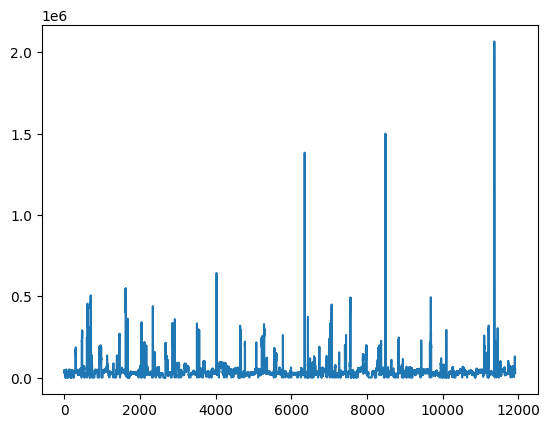

In [29]:
df.price.plot();

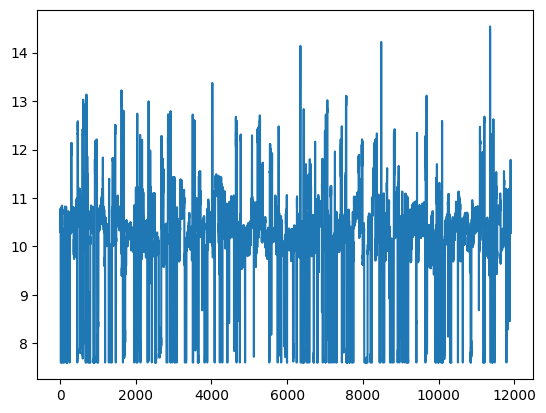

In [30]:
np.log1p(df.price).plot();

In [31]:
(
    df_train, y_train, 
    df_val, y_val, 
    df_test, y_test
) = split_train_val_test(
    df,
    col_y='price', 
    col_discard='above_average'
)

(
    y_train, 
    y_val, 
    y_test
) = (
    np.log1p(y_train), 
    np.log1p(y_val), 
    np.log1p(y_test)
)

#### Scale Features for Convergence
[notebook](https://github.com/DataTalksClub/machine-learning-zoomcamp/blob/master/03-classification/notebook-scaling-ohe.ipynb)

In [32]:
from sklearn.preprocessing import StandardScaler

In [33]:
def scale_df(df):
    subset = numeric.copy()
    subset.remove('price')
    df_num = df[subset]
    model = StandardScaler()
    df_num = model.fit_transform(df_num)
    return df_num
    #subset_other = list(set(df.columns).difference(subset))
    #return pd.concat([pd.DataFrame(df_num, index=df.index, columns=subset), df[subset_other]], axis=1)

In [34]:
#dv = DictVectorizer(sparse=False)

X_train = scale_df(df_train)
#X_train = X_train.to_dict(orient='records')
#X_train = dv.fit_transform(X_train)

X_val = scale_df(df_val)
#X_val = X_val.to_dict(orient='records')
#X_val = dv.fit_transform(X_val)

In [35]:
alphas = [0, 0.01, 0.1, 1, 10]
rmses = []
    
for a in alphas:
    print(f'Running Ridge Regression for {a=}')
    model = Ridge(alpha=a, solver="sag", random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    score = np.sqrt(mean_squared_error(y_val, y_pred))
    rmses.append(score)

Running Ridge Regression for a=0
Running Ridge Regression for a=0.01
Running Ridge Regression for a=0.1
Running Ridge Regression for a=1
Running Ridge Regression for a=10


In [36]:
(
    pd.DataFrame({'rmse': rmses}, index=alphas)
    .style
    .background_gradient(cmap='coolwarm', axis=None)
    .format(precision=3)
)

,rmse
0.000000,0.529
0.010000,0.529
0.100000,0.529
1.000000,0.529
10.000000,0.529


> **Answer 6**: $\alpha=0$